# Dijkstra algorithm

It is an algorithm to find the shortest path for all pair of nodes in an undirected graph.

Below we have an example of an undirected graph



In [34]:
# @hidden_cell
import matplotlib.pyplot as plt
import networkx as nx

def print_graph(graph):
    G = nx.Graph()
    G.add_weighted_edges_from(graph)

    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=700)
    nx.draw_networkx_edges(G, pos, width=6, label=True)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_labels(G, pos, font_size=20, font_family='san-serif')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    plt.axis('off')
    plt.show()

def print_table(labels, values):
    fig, axs = plt.subplots(2, 1)
    axs[0].axis('tight')
    axs[0].axis('off')
    table = axs[0].table(cellText=values, colLabels=labels, loc='center')
    axs[1].axis('off')
    plt.show()

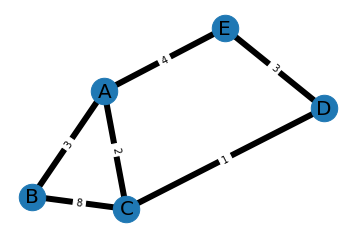

In [2]:
graph = [
    ('A', 'B', 3),
    ('A', 'C', 2),
    ('A', 'E', 4),
    ('B', 'C', 8),
    ('C', 'D', 1),
    ('D', 'E', 3),
]
print_graph(graph)

When we run Dijkstra's algorithm with an undirected weighted graph, we receive the shortest path between each pair of nodes. 

The rules for the algorithm are as follows:

1) Every time that we set out to visit a new node, we will choose the node with the smallest known distance/cost to visit first.

2) Once we’ve moved to the node we’re going to visit, we will check each of its neighboring nodes.


3) For each neighboring node, we’ll calculate the distance/cost for the neighboring nodes by summing the cost of the edges that lead to the node we’re checking from the starting vertex.

4) Finally, if the distance/cost to a node is less than a known distance, we’ll update the shortest distance that we have on file for that vertex.

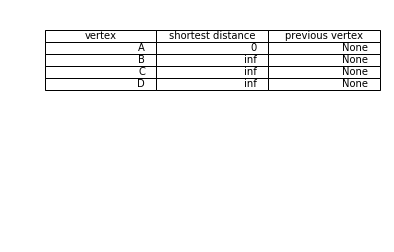

In [33]:
def dijkstra(graph):
    table = []
    nodes = map(lambda x: x[0], graph)
    unique_nodes = sorted(list(set(nodes)))
    table = list(map(lambda x: [x, float('inf'), None], unique_nodes))

    # Starting node
    table[0][1] = 0
    visited = []
    unvisited = unique_nodes

    return table
    

result_table = dijkstra(graph)
print_table(('vertex', 'shortest distance', 'previous vertex'), result_table)

